In [1]:
#wine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

from sklearn import tree
#import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

#load data
df = pd.read_csv (r'./data/wine.csv')

#preprocessing
# convert target to binary
df.loc[df.quality =='bad', "quality"] = 0 #bad wine
df.loc[df.quality == 'good', "quality"] = 1 #good wine
#get the target
y = df.pop('quality')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [2]:
#grid search to find best paramteres
params = {'n_estimators': [20,50,100,150,200,300,400,500]
          , 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
        }
grid_search_cv = GridSearchCV(AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=3),
                                                 random_state=42)
                              , params
                              , scoring = "accuracy"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:  1.6min finished


In [3]:
print("Best ADA estimators: ", grid_search_cv.best_estimator_)

Best ADA estimators:  AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
    

In [4]:
#model with default features
print("Adaboost with default params accuracy: ", cross_val_score(AdaBoostClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean())
print("Adaboost with tuned hyper paramaters accuracy: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean())

Adaboost with default params accuracy:  0.7443443627450981
Adaboost with tuned hyper paramaters accuracy:  0.7810876225490195


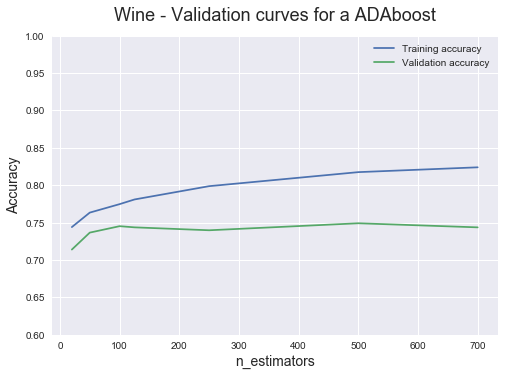

In [5]:
#plot validation curve for n_estimators
n_estimators_range = [20,50, 100, 125,250,500,700]
train_scores, valid_scores = validation_curve(AdaBoostClassifier(learning_rate=0.1),
                                              X_train,
                                              y_train,
                                              param_name = "n_estimators",
                                              param_range = n_estimators_range,
                                              scoring='accuracy',
                                             cv=5)

plt.style.use('seaborn')
plt.plot(n_estimators_range, train_scores.mean(axis=1), label = 'Training accuracy')
plt.plot(n_estimators_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('n_estimators', fontsize = 14)
plt.title('Wine - Validation curves for a ADAboost', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.0)
plt.show()

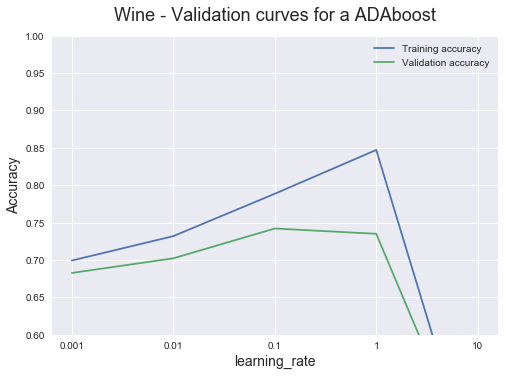

In [6]:
#plot validation curve for learning_rate
learning_rate_range = [0.001, 0.01,0.1,1,10]
train_scores, valid_scores = validation_curve(AdaBoostClassifier(n_estimators=150),
                                              X_train,
                                              y_train,
                                              param_name = "learning_rate",
                                              param_range = learning_rate_range,
                                              scoring='accuracy',
                                             cv=5)

plt.style.use('seaborn')
learning_rate_range = ['0.001', '0.01','0.1','1','10']
plt.plot(learning_rate_range, train_scores.mean(axis=1), label = 'Training accuracy')
plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('learning_rate', fontsize = 14)
plt.title('Wine - Validation curves for a ADAboost', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.0)
plt.show()

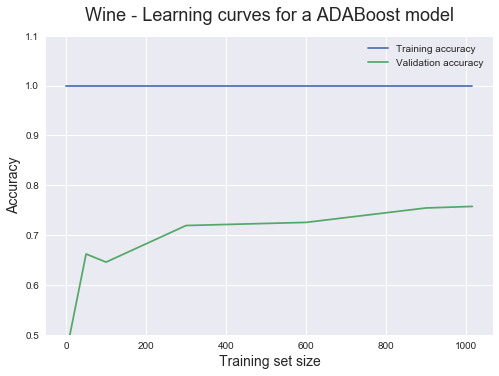

In [8]:
train_sizes = [1,50, 100, 300, 600, 900, 1016]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Wine - Learning curves for a ADABoost model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.show()

In [9]:
#simpler tree with depth =1 to avoid overfitting
ada =AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.1, n_estimators=100, random_state=42)

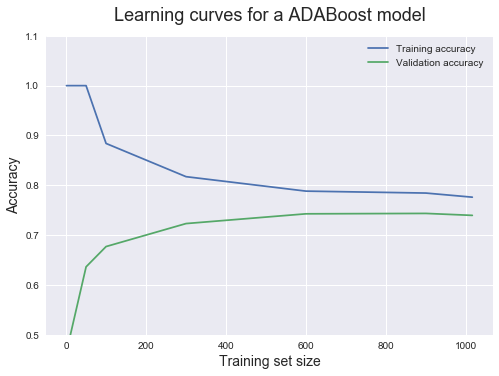

In [10]:
#learning curve

train_sizes = [1,50, 100, 300, 600, 900, 1016]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = ada, #grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a ADABoost model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.show()

In [11]:
#model with default features
print("Adaboost with default params accuracy: ", cross_val_score(AdaBoostClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean())
print("Adaboost with tuned hyper paramaters accuracy: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='accuracy').mean())
print("Adaboost with LC params accuracy: ", cross_val_score(ada, X_train, y_train, cv=5, scoring='accuracy').mean())

Adaboost with default params accuracy:  0.7443443627450981
Adaboost with tuned hyper paramaters accuracy:  0.7810876225490195
Adaboost with LC params accuracy:  0.7451378676470588


In [12]:
#diabetes
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

#load data
df = pd.read_csv (r'./data/diabetes.csv')

#preprocessing
# convert target to binary
df.loc[df["class"] =='tested_negative', "class"] = 0
df.loc[df["class"] == 'tested_positive', "class"] = 1

#get the target
y = df.pop('class')
#scale features
X_scaled = preprocessing.scale(df)

oversample = BorderlineSMOTE(random_state=42)
X_scaled, y = oversample.fit_resample(X_scaled, y)


#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

#decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#plot tree(hide for now)
#tree.plot_tree(clf);

#save tree as pdf
#diabetes_data = tree.export_graphviz(clf, out_file=None)
#graph = graphviz.Source(diabetes_data)
#graph.render("diabetes")

#grid search to find best paramteres
params = {'n_estimators': [20,50,100,150,200,300,500,800]
          , 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
        }
grid_search_cv = GridSearchCV(AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=4),
                                                 random_state=42)
                              , params
                              , scoring = "f1"
                              , verbose=1
                              , cv=5
                              ,n_jobs=5)
grid_search_cv.fit(X_train, y_train);


#best estimators
print("Best estimators: ", grid_search_cv.best_estimator_)

#model with default features
print("ADABoost with default params F1: ", cross_val_score(DecisionTreeClassifier(random_state=42), X_train, y_train, cv=5, scoring='f1').mean())

print('\n', '-' * 20) # separator

#model with perf tuned hyperparameters
print("ADABoost with tuned hyper paramaters: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())



Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:   18.7s
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:  1.4min finished


Best estimators:  AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
        

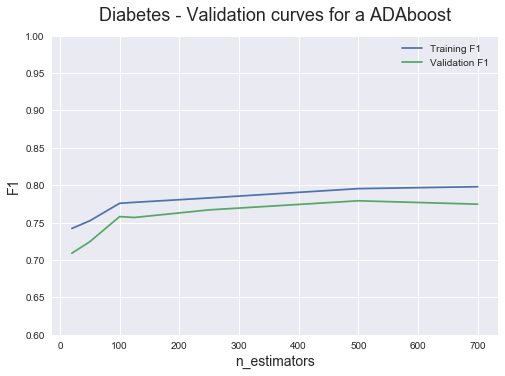

In [13]:
#plot validation curve for n_estimators
n_estimators_range = [20,50, 100, 125,250,500,700]
train_scores, valid_scores = validation_curve(AdaBoostClassifier(learning_rate=0.01),
                                              X_train,
                                              y_train,
                                              param_name = "n_estimators",
                                              param_range = n_estimators_range,
                                              scoring='f1',
                                             cv=5)

plt.style.use('seaborn')
plt.plot(n_estimators_range, train_scores.mean(axis=1), label = 'Training F1')
plt.plot(n_estimators_range, valid_scores.mean(axis=1), label = 'Validation F1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('n_estimators', fontsize = 14)
plt.title('Diabetes - Validation curves for a ADAboost', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.0)
plt.show()

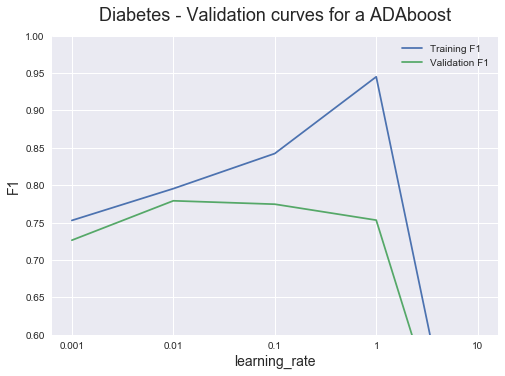

In [14]:
#plot validation curve for learning_rate
learning_rate_range = [0.001, 0.01,0.1,1,10]
train_scores, valid_scores = validation_curve(AdaBoostClassifier(n_estimators=500),
                                              X_train,
                                              y_train,
                                              param_name = "learning_rate",
                                              param_range = learning_rate_range,
                                              scoring='f1',
                                             cv=5)

plt.style.use('seaborn')
learning_rate_range = ['0.001', '0.01','0.1','1','10']
plt.plot(learning_rate_range, train_scores.mean(axis=1), label = 'Training F1')
plt.plot(learning_rate_range, valid_scores.mean(axis=1), label = 'Validation F1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('learning_rate', fontsize = 14)
plt.title('Diabetes - Validation curves for a ADAboost', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,1.0)
plt.show()

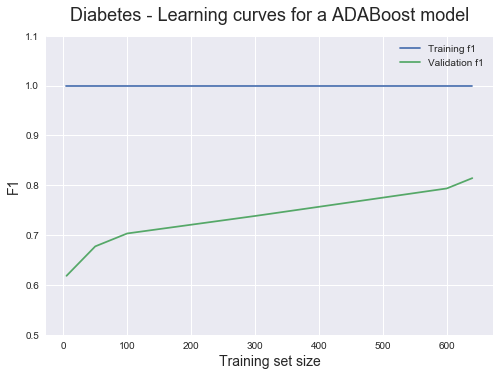

In [15]:
#learning curve

train_sizes = [5,50, 100, 300, 600, 640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curves for a ADABoost model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.show()

In [16]:
ada2 = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.01, n_estimators=500, random_state=42)

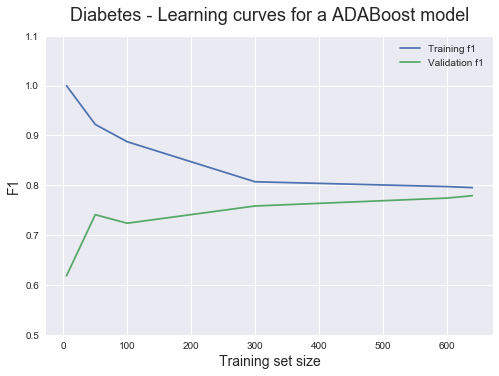

In [17]:
#learning curve

train_sizes = [5,50, 100, 300, 600, 640]

train_sizes, train_scores, validation_scores = learning_curve(
               estimator = ada2, #grid_search_cv.best_estimator_,
               X = X_train,
               y = y_train,
               train_sizes = train_sizes,
               cv = 5,
               scoring = 'f1')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training f1')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation f1')
plt.ylabel('F1', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Diabetes - Learning curves for a ADABoost model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.5,1.1)
plt.show()

In [18]:
#model with default features
print("Adaboost with default params F1: ", cross_val_score(AdaBoostClassifier(), X_train, y_train, cv=5, scoring='f1').mean())
print("Adaboost with tuned hyper paramaters F1: ", cross_val_score(grid_search_cv.best_estimator_, X_train, y_train, cv=5, scoring='f1').mean())
print("Adaboost with LC params F1: ", cross_val_score(ada2, X_train, y_train, cv=5, scoring='f1').mean())

Adaboost with default params F1:  0.7495885133808909
Adaboost with tuned hyper paramaters F1:  0.8144164344574871
Adaboost with LC params F1:  0.7790967445635237
